<a href="https://colab.research.google.com/github/allmore0/tarea_1/blob/main/Clasificaci%C3%B3n_de_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación de vinos (Wine dataset)

In [1]:
# -*- coding: utf-8 -*-
# Importando los módulos de Python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Cargando dataset
wine = load_wine()
X = wine.data
y = wine.target

# One-hot encoding (es la codificación que se utiliza para variables categóricas)
y = to_categorical(y, num_classes=3)

# Escalamiento
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape para CNN (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiendo con el modelo CNN (aquí investigué, pero no lo domino todavía, pero la creación de capas neuronales de 32 y 64 filtros , con 3 características (kernel_size=3))
modelo = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(13,1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Comenzamos el entrenamiento
history = modelo.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evalúo el modelo
loss, acc = modelo.evaluate(X_test, y_test)
print(f"\nLoss: {loss:.4f} - Accuracy: {acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.6677 - loss: 0.9414 - val_accuracy: 0.9444 - val_loss: 0.4495
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9176 - loss: 0.3881 - val_accuracy: 0.9167 - val_loss: 0.1675
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9698 - loss: 0.1421 - val_accuracy: 0.9167 - val_loss: 0.1388
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9887 - loss: 0.0861 - val_accuracy: 0.9444 - val_loss: 0.1306
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9985 - loss: 0.0405 - val_accuracy: 0.9444 - val_loss: 0.1252
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9959 - loss: 0.0695 - val_accuracy: 0.9444 - val_loss: 0.1219
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9965 - loss: 0.0312 - val_accuracy: 0.9444 - val_loss: 0.1205
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9928 - loss: 0.0287 - val_accuracy: 0.9444 - val_los

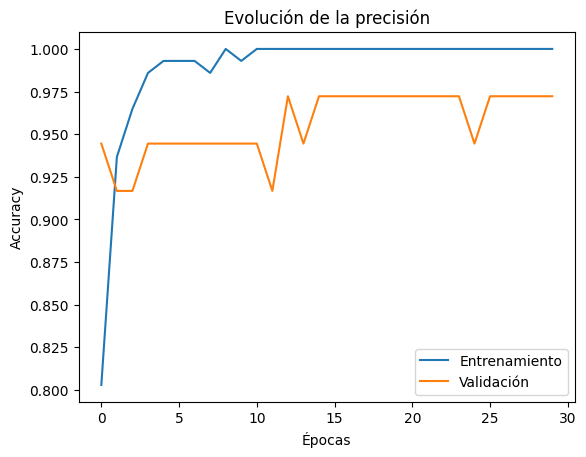

In [3]:
# Gráficas
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Evolución de la precisión')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


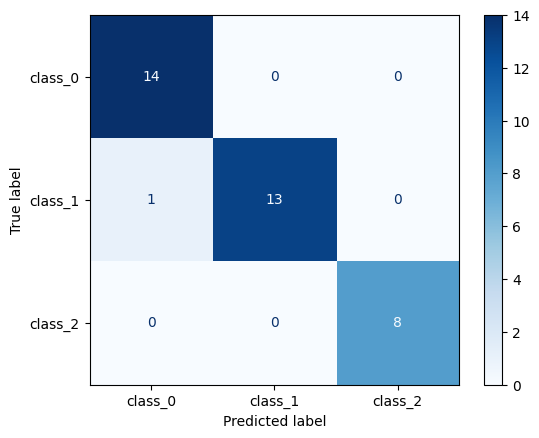


Sensitivity (Recall) por clase:
class_0: 1.00
class_1: 0.93
class_2: 1.00


In [4]:
# Matriz de confusión
pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
for i, s in enumerate(sensitivity):
    print(f"{wine.target_names[i]}: {s:.2f}")

In [5]:
# Predicción de un nuevo vino
nuevo_vino = np.array([[13.2, 2.77, 2.51, 18.5, 98, 2.2, 2.3, 0.26, 1.77, 5.0, 1.15, 3.3, 820]])
nuevo_vino_scaled = scaler.transform(nuevo_vino)
nuevo_vino_scaled = nuevo_vino_scaled.reshape(nuevo_vino_scaled.shape[0], nuevo_vino_scaled.shape[1], 1)
pred_nuevo = modelo.predict(nuevo_vino_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("\nEvaluación de nuevo vino:")
print(f"Resultado: {wine.target_names[clase_predicha]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step

Evaluación de nuevo vino:
Resultado: class_0
